In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IMF_api import IMF_API

In [2]:
IFS_api = IMF_API('IFS')
countries = ['Russian Federation', 'United Kingdom', 'Canada']

In [3]:
for country in countries:
    print(IFS_api.get_country_code(country))

RU
GB
CA


In [3]:
FSI_api = IMF_API('FSI')
search = 'capital risk'
FSI_api.indicator_search(search)

,@value,#text
0,FSKRC_PT,"Financial, Financial Soundness Indicators, Cor..."
1,FSDKRC_EUR,"Financial, Financial Soundness Indicators, Cor..."
2,FSDKRC_XDC,"Financial, Financial Soundness Indicators, Cor..."
3,FSDKRC_USD,"Financial, Financial Soundness Indicators, Cor..."
4,FSKRTC_PT,"Financial, Financial Soundness Indicators, Cor..."
5,FSDKRTC_EUR,"Financial, Financial Soundness Indicators, Cor..."
6,FSDKRTC_XDC,"Financial, Financial Soundness Indicators, Cor..."
7,FSDKRTC_USD,"Financial, Financial Soundness Indicators, Cor..."
8,FSDSNO_EUR,"Financial, Financial Soundness Indicators, Cor..."
9,FSDSNO_XDC,"Financial, Financial Soundness Indicators, Cor..."


In [5]:
results = FSI_api.search_data_availability(search, countries, 2000, 2020, 'Q', sleep_time=1.5)
results[results['data_availability'] != 'N/A']

,@value,#text,country,data_availability
0,FSKRC_PT,"Financial, Financial Soundness Indicators, Cor...",Russian Federation,2008-2020
1,FSKRC_PT,"Financial, Financial Soundness Indicators, Cor...",United Kingdom,2008-2020
2,FSKRC_PT,"Financial, Financial Soundness Indicators, Cor...",Canada,2005-2020
6,FSDKRC_XDC,"Financial, Financial Soundness Indicators, Cor...",Russian Federation,2008-2020
7,FSDKRC_XDC,"Financial, Financial Soundness Indicators, Cor...",United Kingdom,2008-2020
8,FSDKRC_XDC,"Financial, Financial Soundness Indicators, Cor...",Canada,2005-2020
12,FSKRTC_PT,"Financial, Financial Soundness Indicators, Cor...",Russian Federation,2008-2020
13,FSKRTC_PT,"Financial, Financial Soundness Indicators, Cor...",United Kingdom,2008-2020
14,FSKRTC_PT,"Financial, Financial Soundness Indicators, Cor...",Canada,2005-2020
18,FSDKRTC_XDC,"Financial, Financial Soundness Indicators, Cor...",Russian Federation,2008-2020


In [6]:
IFS_api = IMF_API('IFS')
search = 'exchange real effective'
IFS_api.indicator_search(search)

,@value,#text
0,EREER_IX,"Exchange Rates, Real Effective Exchange Rate b..."
1,EREER_PC_CP_A_PT,"Exchange Rates, Real Effective Exchange Rate b..."
2,EREER_ULC_IX,"Exchange Rates, Real Effective Exchange Rate b..."


In [7]:
results = IFS_api.search_data_availability(search, countries, 2000, 2020, 'Q', sleep_time=1.5)
results[results['data_availability'] != 'N/A']

,@value,#text,country,data_availability
0,EREER_IX,"Exchange Rates, Real Effective Exchange Rate b...",Russian Federation,2000-2020
1,EREER_IX,"Exchange Rates, Real Effective Exchange Rate b...",United Kingdom,2000-2020
2,EREER_IX,"Exchange Rates, Real Effective Exchange Rate b...",Canada,2000-2020
7,EREER_ULC_IX,"Exchange Rates, Real Effective Exchange Rate b...",United Kingdom,2000-2020
8,EREER_ULC_IX,"Exchange Rates, Real Effective Exchange Rate b...",Canada,2000-2020


In [4]:
indicators_FSI = ['FSKRC_PT', 'FSKRTC_PT']
indicators_IFS = ['EREER_IX']

In [6]:
for indicator in indicators_FSI:
    print(FSI_api.get_indicator_name(indicator))

for indicator in indicators_IFS:
    print(IFS_api.get_indicator_name(indicator))

Financial, Financial Soundness Indicators, Core Set, Deposit Takers, Capital Adequacy, Regulatory Capital to Risk-Weighted Assets, Percent
Financial, Financial Soundness Indicators, Core Set, Deposit Takers, Capital Adequacy, Regulatory Tier 1 Capital to Risk-Weighted Assets, Percent
Exchange Rates, Real Effective Exchange Rate based on Consumer Price Index, Index


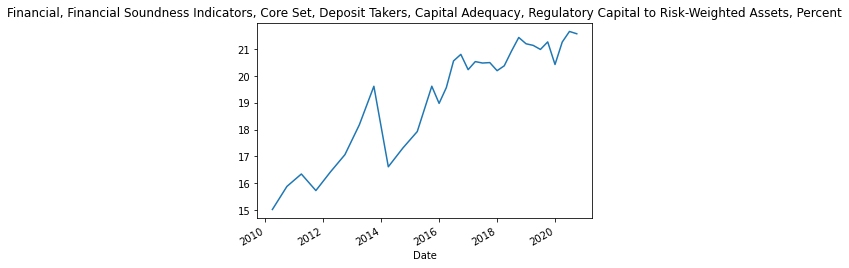

In [29]:
uk_FSKRC_PT = FSI_api.get_series(indicator='FSKRC_PT', country='United Kingdom', startYear=2010, endYear=2020, frequency='Q', sleep_time=3)
uk_FSKRC_PT.plot()
plt.title(uk_FSKRC_PT.name)
plt.show()

In [26]:
IFS_api = IMF_API('IFS')
FSI_api = IMF_API('FSI')

data_IFS = IFS_api.get_indicators(indicators_IFS, countries, 2010, 2020, 'Q', sleep_time=2)
data_FSI = FSI_api.get_indicators(indicators_FSI, countries, 2010, 2020, 'Q', sleep_time=2)
dataset = pd.merge(data_FSI, data_IFS, how='outer', on=['Date', "country"]).sort_index()

In [27]:
dataset

,"Regulatory Capital to Risk-Weighted Assets, Percent","Regulatory Tier 1 Capital to Risk-Weighted Assets, Percent",country,"Real Effective Exchange Rate based on Consumer Price Index, Index"
Date,,,,
2010-01-01,20.483177,14.606693,Russian Federation,98.812598
2010-01-01,NaN,NaN,United Kingdom,99.060989
2010-01-01,14.816699,12.414406,Canada,98.761962
2010-04-01,18.851378,14.072243,Russian Federation,102.486504
2010-04-01,15.027093,12.351023,United Kingdom,98.863391
...,...,...,...,...
2020-07-01,15.702111,13.457219,Canada,80.917568
2020-07-01,12.735491,10.371338,Russian Federation,78.200748
2020-10-01,21.568759,18.489046,United Kingdom,98.277274


In [28]:
dataset.to_csv('./data/imf_dataset.csv')